In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train #3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train #3.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test #3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test #3.csv", index_col=0)

In [3]:
rand_forest = RandomForestClassifier(n_estimators=10, max_depth = 30, random_state=10, class_weight="balanced")

In [4]:
rand_forest.fit(X_train, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=10,
                       random_state=10)

In [5]:
y_pred = rand_forest.predict(X_test)

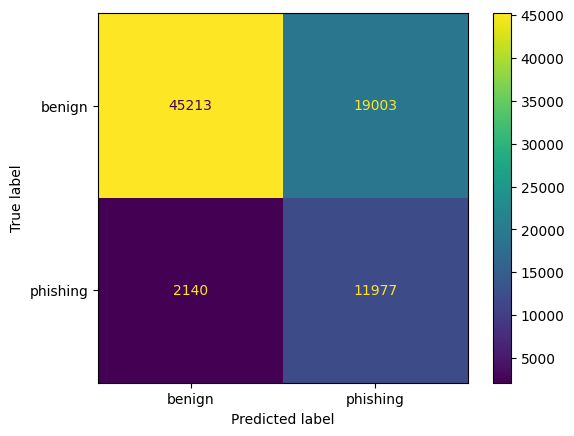

In [6]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [7]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [9]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7300882131413325, 'Precision': 0.386604260813428, 'Recall': 0.8484097187787774, 'F1_score': 0.5311661529591768}


In [10]:
df = pd.read_csv("Metrics of Dataset #3.csv")

In [11]:
metrics = pd.DataFrame({"Model": "Random Forest", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [12]:
df = pd.concat([df, metrics], ignore_index=True)

In [13]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.625305,0.304140,0.837855,0.446281
1,Random Forest,0.730088,0.386604,0.848410,0.531166


In [14]:
df.to_csv("Metrics of Dataset #3.csv", index=False)

In [15]:
dump(rand_forest, 'rand_forest #3.joblib')

['rand_forest #3.joblib']